# Importing necessary packages

In [1]:
import numpy as np 
import pandas as pd 
import re, string

# NLTK(natural language toolkit is used for text cleaning and tokenizing and sentiment analysis)

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from nltk.probability import FreqDist
from nltk.tokenize import TweetTokenizer
from nltk.collocations import *
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package stopwords to /home/noufal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/noufal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/noufal/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/home/noufal/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


# Scikit learn package for vectorisation and clustering

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.cluster import KMeans  
from sklearn.metrics.pairwise import cosine_similarity

# matplotlib for plotting

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# Importing data

In [5]:
data = pd.read_csv('/home/noufal/Downloads/code_gladiator/merged_twitter_data_final.csv', low_memory=False)

In [6]:
data.head()

,author,host,authority,contents
0,AurianSky,http://twitter.com/AurianSky,2,Wants to be done with her article analysis and...
1,iMorpheus,http://twitter.com/iMorpheus,0,09:42 JST LESSON{Text analysis and layout comp...
2,segwist,http://twitter.com/segwist,6,First PSP game reviews for Time Off published ...
3,MELISSANTHROPE,http://twitter.com/MELISSANTHROPE,5,I'm in a cute little coffee shop
4,lungcancer_news,http://twitter.com/lungcancer_news,5,Green tea


In [7]:
len(data)

139221

In [8]:
data.describe() #descriptive statistics

,author,host,authority,contents
count,139212,122462,121584,121253
unique,82455,67920,407,92449
top,Green_Tea_Cake_,http://twitter.com/Green_Tea_Cake_,4,Long Jing Green tea from China
freq,1527,1527,15098,859


In [9]:
data = data.dropna(axis=0, how='any') # missing data is dropped for better result
data = data.drop_duplicates(subset=["contents"], keep= 'first') # duplicate tweets are dropped of improving model

In [10]:
len(data) # length of data after pre-processing

92448

### top 10 authers

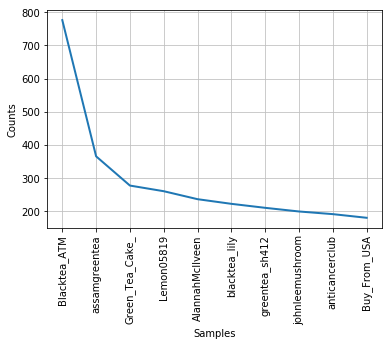

In [11]:
users = data["author"].tolist()
freq_dist = FreqDist(users)
freq_dist.plot(10)

## Data cleaning

In [12]:
tweets_texts = data["contents"].tolist()
stopwords=stopwords.words('english')
english_vocab = set(w.lower() for w in nltk.corpus.words.words())
def process_tweet_text(tweet):
    tweet = re.sub(r'\$\w*','',tweet) # Remove tickers
    tweet = re.sub(r'https?:\/\/.*\/\w*','',tweet) # Remove hyperlinks
    tweet = re.sub(r'['+string.punctuation+']+', ' ',tweet) # Remove puncutations like 's
    twtok = TweetTokenizer(strip_handles=True, reduce_len=True)
    tokens = twtok.tokenize(tweet) #tokenizing tweets
    tokens = [i.lower() for i in tokens if i not in stopwords and len(i) > 2 and  i in english_vocab]
    return tokens
words = []
for tw in tweets_texts:
    words += process_tweet_text(tw)

In [13]:
words # words used in all the tweets

['done',
 'article',
 'analysis',
 'drink',
 'green',
 'tea',
 'read',
 'analysis',
 'layout',
 'complete',
 'game',
 'yesterday',
 'get',
 'overdue',
 'analysis',
 'green',
 'tea',
 'cute',
 'little',
 'coffee',
 'shop',
 'tea',
 'warm',
 'welcome',
 'usual',
 'work',
 'tea',
 'operating',
 'trend',
 'analysis',
 'match',
 'made',
 'heaven',
 'drink',
 'green',
 'tea',
 'analysis',
 'lower',
 'risk',
 'stroke',
 'among',
 'tea',
 'according',
 'got',
 'class',
 'reading',
 'crime',
 'analysis',
 'problem',
 'handbook',
 'green',
 'tea',
 'lemonade',
 'nutrition',
 'analysis',
 'regular',
 'green',
 'tea',
 'compare',
 'green',
 'tea',
 'forever',
 'finished',
 'dinner',
 'desert',
 'get',
 'analysis',
 'done',
 'tonight',
 'meta',
 'analysis',
 'origin',
 'trust',
 'everyone',
 'great',
 'high',
 'day',
 'tea',
 'analysis',
 'variability',
 'post',
 'fat',
 'analysis',
 'effects',
 'green',
 'tea',
 'weight',
 'loss',
 'weight',
 'maintenance',
 'meta',
 'analysis',
 'analysis',
 'sma

In [14]:
len(words) 

384984

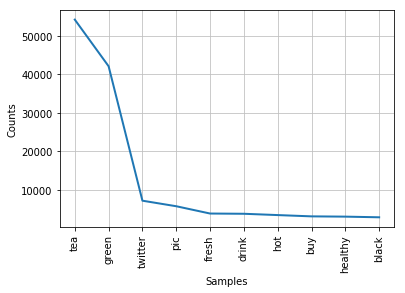

In [15]:
freq_dist_words = FreqDist(words) # top 10 words used and its frequency
freq_dist_words.plot(10)

In [16]:
cleaned_tweets = []
for tw in tweets_texts:
    word = process_tweet_text(tw)
    cleaned_tweet = " ".join(w for w in word if len(w) > 2 and 
w.isalpha()) #Form sentences of processed words
    cleaned_tweets.append(cleaned_tweet)
data['CleanTweetText'] = cleaned_tweets

## finding N-gram of words 

### that is the related words in the list of words

In [17]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(words, 5)
finder.apply_freq_filter(5)
print(finder.nbest(bigram_measures.likelihood_ratio, 10))

[('pic', 'twitter'), ('green', 'tea'), ('pic', 'pic'), ('twitter', 'pic'), ('twitter', 'twitter'), ('weight', 'loss'), ('green', 'green'), ('powerhouse', 'tangy'), ('tea', 'tea'), ('tangy', 'recipe')]


# TF-IDF method is used to vectorize the words in the corpus

In [18]:
tfidf_vectorizer = TfidfVectorizer(use_idf=True, ngram_range=(1,3))  
tfidf_matrix = tfidf_vectorizer.fit_transform(cleaned_tweets)  
feature_names = tfidf_vectorizer.get_feature_names() # num phrases  

## K- mean clustering to group the words to clusters

In [19]:
num_clusters = 3  
km = KMeans(n_clusters=num_clusters)  
km.fit(tfidf_matrix)  
clusters = km.labels_.tolist()  
data['Cluster'] = clusters  
print(data['Cluster'].value_counts())

2    86353
1     3297
0     2798
Name: Cluster, dtype: int64


In [20]:
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(num_clusters):
    print("Cluster {} : Words :".format(i))
    for ind in order_centroids[i, :10]: 
        print(' %s' % feature_names[ind])

Cluster 0 : Words :
 tea
 green
 green tea
 tea green tea
 tea green
 green tea green
 get carbonation kick
 get caramel
 get carbonation
 get card
Cluster 1 : Words :
 pic
 twitter
 pic twitter
 tea pic twitter
 tea pic
 tea
 pic twitter pic
 twitter pic twitter
 twitter pic
 get calorie chocolate
Cluster 2 : Words :
 tea
 green
 green tea
 fresh
 via
 drink
 special
 buy
 hot
 healthy


In [21]:
data[data['Cluster'] == 1].head()

,author,host,authority,contents,CleanTweetText,Cluster
1518,kyarisepticeye,http://twitter.com/kyarisepticeye,1,ANALYSIS FT. GREEN TEA FRAPPEEE pic.twitter.c...,pic twitter,1
2024,Mattwesty5,http://twitter.com/Mattwesty5,8,Rocking some #greentea pic.twitter.com/JIcbFNsV,pic twitter,1
2456,MinnTEAsota,http://twitter.com/MinnTEAsota,7,Maple Grove GM Rockie- Rocking her Green Tea K...,twitter,1
2617,Rocking_Libra,http://twitter.com/Rocking_Libra,9,Green tea!!! pic.twitter.com/KHiG7hU6Cl,tea pic twitter,1
3984,shyshuu,http://twitter.com/shyshuu,3,Greentea Latte? (@ CAFF� PASCUCCI w/ 3 others)...,pic,1


In [22]:
data[data['Cluster'] == 2].head()

,author,host,authority,contents,CleanTweetText,Cluster
0,AurianSky,http://twitter.com/AurianSky,2,Wants to be done with her article analysis and...,done article analysis drink green tea read,2
1,iMorpheus,http://twitter.com/iMorpheus,0,09:42 JST LESSON{Text analysis and layout comp...,analysis layout complete,2
2,segwist,http://twitter.com/segwist,6,First PSP game reviews for Time Off published ...,game yesterday get overdue analysis green tea,2
3,MELISSANTHROPE,http://twitter.com/MELISSANTHROPE,5,I'm in a cute little coffee shop,cute little coffee shop,2
6,cptsalek,http://twitter.com/cptsalek,9,A warm welcome to @cains. Business as usual: I...,warm welcome usual work,2


In [23]:
data[data['Cluster'] == 0].head()

,author,host,authority,contents,CleanTweetText,Cluster
4,lungcancer_news,http://twitter.com/lungcancer_news,5,Green tea,tea,0
47,kevindeleon,http://twitter.com/kevindeleon,2,green tea,green tea,0
72,lmchafer,http://twitter.com/lmchafer,5,Green tea & Wilco & Social Network Analysis,tea,0
83,ReinaldoNeese,http://twitter.com/ReinaldoNeese,1,:O green tea Indonesia Slimming Products Mark...,green tea,0
99,KeywordNews1,http://twitter.com/KeywordNews1,7,"""Keyword Analysis for """"green tea hoodia"""" htt...",green tea,0


# Sentiment analysis is done using vader sentiment analyser package from nltk and classified to 4 groups containing negative, neutral, positive, and compound

In [24]:
negative = []
neutral = []
positive = []
compound = []

In [25]:
VaderAnalyzer = SentimentIntensityAnalyzer()

for contents in data["CleanTweetText"]:
    scores = VaderAnalyzer.polarity_scores(contents)
    negative.append(scores.get('neg'))
    neutral.append(scores.get('neu'))
    positive.append(scores.get('pos'))
    compound.append(scores.get('compound'))

In [26]:
s_negative = pd.Series(negative)
s_neutral = pd.Series(neutral)
s_positive = pd.Series(positive)
s_compound = pd.Series(compound)

data['negative'] = s_negative.values
data['neutral'] = s_neutral.values
data['positive'] = s_positive.values
data['compound'] = s_compound.values

In [27]:
data

,author,host,authority,contents,CleanTweetText,Cluster,negative,neutral,positive,compound
0,AurianSky,http://twitter.com/AurianSky,2,Wants to be done with her article analysis and...,done article analysis drink green tea read,2,0.000,1.000,0.000,0.0000
1,iMorpheus,http://twitter.com/iMorpheus,0,09:42 JST LESSON{Text analysis and layout comp...,analysis layout complete,2,0.000,1.000,0.000,0.0000
2,segwist,http://twitter.com/segwist,6,First PSP game reviews for Time Off published ...,game yesterday get overdue analysis green tea,2,0.000,1.000,0.000,0.0000
3,MELISSANTHROPE,http://twitter.com/MELISSANTHROPE,5,I'm in a cute little coffee shop,cute little coffee shop,2,0.000,0.500,0.500,0.4588
4,lungcancer_news,http://twitter.com/lungcancer_news,5,Green tea,tea,0,0.000,1.000,0.000,0.0000
6,cptsalek,http://twitter.com/cptsalek,9,A warm welcome to @cains. Business as usual: I...,warm welcome usual work,2,0.000,0.290,0.710,0.5994
7,thejakers,http://twitter.com/thejakers,7,Green tea and operating trend analysis. A matc...,tea operating trend analysis match made heaven,2,0.000,0.645,0.355,0.5106
8,Healthynewage,http://twitter.com/Healthynewage,8,Going to drink more green tea! Meta-analysis f...,drink green tea analysis lower risk stroke amo...,2,0.350,0.650,0.000,-0.5106
9,br33zy_duz_it,http://twitter.com/br33zy_duz_it,9,Just got to class reading a crime analysis for...,got class reading crime analysis problem handb...,2,0.437,0.563,0.000,-0.7351
10,jordanssimon,http://twitter.com/jordanssimon,0,How does the nutrition analysis of regular gre...,nutrition analysis regular green tea compare g...,2,0.000,1.000,0.000,0.0000
